<a href="https://colab.research.google.com/github/surensnyper/class_CSC447_547-AI/blob/main/Surveillance3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. https://github.com/ShreyasArthur/AbnormalEventDetection
  - Implementation based no Classic Python
2. https://github.com/rutviz/anomaly-detection
  - anomaly, nomal.text file
3. https://github.com/GaneshVShinde/Anomaly-Detection-and-classification-in-surveillance-videos/tree/1d2c07eee58286111013493eafe8cca91b50c1b9 
  - Implementation based no Colab
4. https://www.dropbox.com/sh/75v5ehq4cdg5g5g/AABvnJSwZI7zXb8_myBA0CLHa?dl=0
  - Dataset

### 3. @GaneshVShinde
- Some errors in the code

In [ ]:
!git clone https://github.com/GaneshVShinde/Anomaly-Detection-and-classification-in-surveillance-videos

Cloning into 'Anomaly-Detection-and-classification-in-surveillance-videos'...
remote: Enumerating objects: 4333, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 4333 (delta 0), reused 3 (delta 0), pack-reused 4330
Receiving objects: 100% (4333/4333), 358.68 MiB | 39.65 MiB/s, done.
Resolving deltas: 100% (733/733), done.
Checking out files: 100% (984/984), done.


In [ ]:
!python /content/Anomaly-Detection-and-classification-in-surveillance-videos/Data_loader.py

In [ ]:
!python /content/Anomaly-Detection-and-classification-in-surveillance-videos/video_utils.py

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
import tensorflow as tf


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [ ]:
fl=open("/content/Anomaly-Detection-and-classification-in-surveillance-videos/Data_set.pkl",'rb')
data=pickle.load(fl)

In [ ]:
data.keys()


dict_keys(['File_location', 'Anomaly_type', 'anomaly_frames'])

In [ ]:
frames=[]
class_type=[]
path="/content/Anomaly-Detection-and-classification-in-surveillance-videos/out"

In [ ]:
for i,frm in enumerate(data['anomaly_frames']):
    if len(frm) != 0:
        vid_path=os.path.join(path,data['File_location'][i] )
        with open(vid_path,'r') as f:
            lines = f.read().splitlines()
        for frm_no in data['anomaly_frames'][i]:
            frames.append(np.float32(lines[frm_no].split()))
            class_type.append(data['Anomaly_type'])

In [ ]:
len(frames),len(class_type)


(734, 734)

In [ ]:
frames=np.array(frames)
class_type =np.array(class_type)
class_type = class_type.flatten()

In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220527125636.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636


In [ ]:
!pip install tensorflow==1.13.2
# !pip install tensorflow==1.14
# tensorflow.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.contrib.layers import fully_connected,dropout

In [ ]:
n_inputs = 4096
n_hidden1 = 512
n_hidden2 = 100
n_outputs = 2

In [ ]:
X=tf.placeholder(tf.float32,shape=(None,n_inputs)
                ,name='X')
Y=tf.placeholder(tf.int64,shape=(None),name='Y')

In [ ]:
with tf.name_scope("dnn"):
    hidden1 = fully_connected(X,n_hidden1,scope="hidden1")
    
    hidden1_drop=dropout(hidden1,keep_prob=0.4)
    
    hidden2 = fully_connected(hidden1_drop,n_hidden1,scope="hidden2")
    
    hidden2_drop=dropout(hidden2,keep_prob=0.6)
    
    logits=fully_connected(hidden2_drop,n_outputs,scope="output",activation_fn=None)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=Y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [ ]:
learning_rate = 0.01
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [ ]:
with tf.name_scope("blaa"):
    correct = tf.nn.in_top_k(logits, Y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [ ]:
n_epochs = 100
batch_size = 50
batch_training=50
accTr=[]
accTst=[]
saver = tf.train.Saver()

In [ ]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [ ]:
for epoch in range(n_epochs):
    for iteration in range(10):

        rndm = np.random.randint(0,733,batch_size) # taking random frames
        X_batch = frames[rndm]
        Y_batch = class_type[rndm]


        sess.run(training_op, feed_dict={X: X_batch, Y: Y_batch})


    acc_train = accuracy.eval(session=sess,feed_dict={X: X_batch, Y: Y_batch})
    
    accTr.append(acc_train)

    rndm = np.random.randint(0,733,30)

    X_test = frames[rndm]
    Y_test = class_type[rndm]

    acc_test = accuracy.eval(session=sess,feed_dict={X: X_test,
    Y: Y_test})
    
    accTst.append(acc_test)

    print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    if epoch%50 ==1:
        saved_path = saver.save(sess, '/content/Anomaly-Detection-and-classification-in-surveillance-videos/classification_model/'+str(epoch)+'/model', global_step=epoch)

0 Train accuracy: 0.88 Test accuracy: 0.8
1 Train accuracy: 0.94 Test accuracy: 0.96666664
2 Train accuracy: 0.92 Test accuracy: 0.9
3 Train accuracy: 0.92 Test accuracy: 0.8666667
4 Train accuracy: 0.9 Test accuracy: 1.0
5 Train accuracy: 0.96 Test accuracy: 0.96666664
6 Train accuracy: 0.96 Test accuracy: 1.0
7 Train accuracy: 1.0 Test accuracy: 0.8666667
8 Train accuracy: 0.94 Test accuracy: 1.0
9 Train accuracy: 0.94 Test accuracy: 1.0
10 Train accuracy: 0.96 Test accuracy: 1.0
11 Train accuracy: 0.96 Test accuracy: 0.96666664
12 Train accuracy: 1.0 Test accuracy: 0.96666664
13 Train accuracy: 0.92 Test accuracy: 0.93333334
14 Train accuracy: 0.98 Test accuracy: 0.93333334
15 Train accuracy: 0.94 Test accuracy: 1.0
16 Train accuracy: 1.0 Test accuracy: 1.0
17 Train accuracy: 0.94 Test accuracy: 0.9
18 Train accuracy: 1.0 Test accuracy: 0.93333334
19 Train accuracy: 0.98 Test accuracy: 0.96666664
20 Train accuracy: 1.0 Test accuracy: 0.93333334
21 Train accuracy: 0.96 Test accuracy:

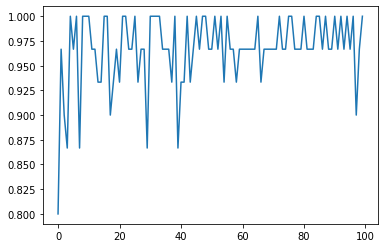

In [ ]:
plt.plot(accTst)


In [ ]:
acc_test

1.0

In [ ]:
!python /content/Anomaly-Detection-and-classification-in-surveillance-videos/Neural_network.py

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

Training

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
import tensorflow as tf


In [ ]:
# !dir
# !pwd
%cd Anomaly-Detection-and-classification-in-surveillance-videos

/content/Anomaly-Detection-and-classification-in-surveillance-videos


In [ ]:
!pwd

/content/Anomaly-Detection-and-classification-in-surveillance-videos


In [ ]:
from Data_loader import *
from Neural_network import *

In [ ]:
x = tf.placeholder('float', [None, 4096])
#y = tf.placeholder('float')
hl = tf.placeholder('float') #hinge_loss


In [ ]:
Anomaly,Normal=get_training_set("/content/Anomaly-Detection-and-classification-in-surveillance-videos/out")


In [ ]:
output , weights_1 , weights_2, weights_3 = dnn_network(x)
cost = 0.001 * (tf.nn.l2_loss(weights_1) + tf.nn.l2_loss(weights_2) + tf.nn.l2_loss(weights_3)) + hl
optimizer = tf.train.AdagradOptimizer(0.001).minimize(cost)


Instructions for updating:
Use keras.layers.dropout instead.


In [ ]:
saver = tf.train.Saver()  # to save model


In [ ]:
# Stoering details for tensorboard
tf.summary.scalar('cost', cost)
tf.summary.histogram('h_w1', weights_1)
tf.summary.histogram('h_w2',weights_2)
tf.summary.histogram('h_w3',weights_3)
merged_summary_op = tf.summary.merge_all()


In [ ]:
# Initialize and run
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


In [ ]:
epochs=501
print_epoch =20
save_model_epoch=500
count=0


In [ ]:
#los =[] #loss array

train_writer = tf.summary.FileWriter("/content/Anomaly-Detection-and-classification-in-surveillance-videos/logs/Dnn_session",tf.get_default_graph())

for epoch in range(epochs):

    i=0
    anomaly,normal = get_training_set("/content/Anomaly-Detection-and-classification-in-surveillance-videos/out") # getting data

    while i < len(anomaly):

        start = i

        end =i+batch_size

        batch_x =np.array(anomaly[start:end])
        batch_y =np.array(normal[start:end])  # Single Video of normal and anomolus


        anomaly_score = sess.run(output,feed_dict={x: batch_x})
        normal_score,W1= sess.run([output,weights_1],feed_dict={x: batch_y})  # calaculated score of anomolus and normal video

        # calculation of hinge loss-------------------------------------------------
        anomaly_score = anomaly_score.flatten()
        normal_score = normal_score.flatten()

        l = max(0.0,(1-anomaly_score.max()+normal_score.max())) #loss implementation

        add = 0.0
        for index in range(len(anomaly_score) - 1):
            add += (anomaly_score[index] - anomaly_score[index+1]) ** 2

        final_cost = l + (add*1.0 + anomaly_score.sum()) * 0.00008 

        # loss completd----------------------------------------------------------

        o,_,cst,summ = sess.run([optimizer,output,cost,merged_summary_op], feed_dict={hl : final_cost,x: batch_x})


        i =i + batch_size

        train_writer.add_summary(summ,count) # summaries for tensorBoard

        count += 1
    #los.append(cst)

    if epoch %print_epoch ==1:
        print('Epoch', epoch, 'completed out of',epochs,'loss:',cst)

    if epoch%save_model_epoch == 1:
        saved_path = saver.save(sess, '/content/Anomaly-Detection-and-classification-in-surveillance-videos/model_logs/'+str(epoch)+'/model', global_step=epoch)


Epoch 1 completed out of 501 loss: 1057.3972
Epoch 21 completed out of 501 loss: 1053.4169
Epoch 41 completed out of 501 loss: 1049.4843
Epoch 61 completed out of 501 loss: 1046.5999
Epoch 81 completed out of 501 loss: 1041.7615
Epoch 101 completed out of 501 loss: 1037.9692
Epoch 121 completed out of 501 loss: 1034.2151
Epoch 141 completed out of 501 loss: 1030.5035
Epoch 161 completed out of 501 loss: 1027.6083
Epoch 181 completed out of 501 loss: 1023.20026
Epoch 201 completed out of 501 loss: 1019.6171
Epoch 221 completed out of 501 loss: 1016.04315
Epoch 241 completed out of 501 loss: 1012.2683
Epoch 261 completed out of 501 loss: 1009.02637
Epoch 281 completed out of 501 loss: 1005.5671
Epoch 301 completed out of 501 loss: 1002.14374
Epoch 321 completed out of 501 loss: 998.7486
Epoch 341 completed out of 501 loss: 995.38666
Epoch 361 completed out of 501 loss: 991.0533
Epoch 381 completed out of 501 loss: 987.7525
Epoch 401 completed out of 501 loss: 984.47504
Epoch 421 complete

Testing

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
import tensorflow as tf


In [ ]:
from Neural_network import *
from Data_loader import *
from video_utils import *

In [ ]:
x = tf.placeholder('float', [None, 4096])

In [ ]:
output , weights_1 , weights_2, weights_3 = dnn_network(x)


In [ ]:
# Initialize and run
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


In [ ]:
saver = tf.train.Saver()  # to save model


In [ ]:
%cd Anomaly-Detection-and-classification-in-surveillance-videos

/content/Anomaly-Detection-and-classification-in-surveillance-videos


In [ ]:
# ?? Debugging needed
saver.restore(sess, './model_logs/501/501/model-501')

INFO:tensorflow:Restoring parameters from ./model_logs/501/501/model-501


NotFoundError: ignored

In [ ]:
def check_video_contains_anomaly(video):
    prediction_a=sess.run(output,feed_dict={x: video})
    prediction_a=prediction_a.flatten()
     # if anomaly score is greater then 0.4 then consider as anomaly 
    index = np.where(prediction_a>0.4)[0]
    pred=0
    if prediction_a.max() > 0.4:
        pred=1
    return pred,index
    

this section generates data for further classification of video in to (fighting/accident)


In [ ]:
abnormal_path="./out"
a_t_vid = get_video_list("./out"+"/anomaly.txt")

In [ ]:
# for fighting video class will be 1
# for roadaccidents vlass will be 0

class_vid=[]
prediction =[] # prediction only for anomaly detection
anomaly_frames=[]

#video_class
for i in range(len(a_t_vid)):
    
    vid_path=os.path.join(abnormal_path,a_t_vid[i] )
    
    with open(vid_path,'r') as f:
        lines = f.read().splitlines()
        key=os.path.basename(a_t_vid[i])
        key=os.path.splitext(key)[0]
        
        if "Fighting" in key: # this is for further classification using DNN
            class_vid.append(1)
        elif "Road" in key:
            class_vid.append(0)
            
        features=[]
    
    for line in lines:
        features.append(np.float32(line.split()))
    
    is_anomaly,a_loc=check_video_contains_anomaly(features)
    
    prediction.append(is_anomaly)
    anomaly_frames.append(a_loc)


In [ ]:
import pickle

dup_set=open("Data_set.pkl","wb")
pickle.dump({"File_location":a_t_vid,
             "Anomaly_type":class_vid,
             "anomaly_frames":anomaly_frames},dup_set)


Anomaly type menas (1:Fighting / 0: Accident) AnomalyFrame contains frame no where anomaly occured.
This Data Set is used for further anomaly type classification


In [ ]:
import pandas as pd
pd.DataFrame(zip(a_t_vid,class_vid,anomaly_frames),columns=['File_location', 'Anomaly_type', 'Anomaly_frame'])


,File_location,Anomaly_type,Anomaly_frame
0,Anomaly-Videos-Part-2/Fighting/Fighting002_x26...,1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,Anomaly-Videos-Part-2/Fighting/Fighting003_x26...,1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,Anomaly-Videos-Part-2/Fighting/Fighting004_x26...,1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,Anomaly-Videos-Part-2/Fighting/Fighting005_x26...,1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,Anomaly-Videos-Part-2/Fighting/Fighting006_x26...,1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
...,...,...,...
171,Anomaly-Videos-Part-3/RoadAccidents/RoadAccide...,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
172,Anomaly-Videos-Part-3/RoadAccidents/RoadAccide...,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
173,Anomaly-Videos-Part-3/RoadAccidents/RoadAccide...,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
174,Anomaly-Videos-Part-3/RoadAccidents/RoadAccide...,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,..."


In [ ]:
normal_path="./out"
n_t_vid = get_video_list("./out"+"/anomaly.txt")


In [ ]:
pred_n=[]
for i in range(len(n_t_vid)):
    vid_path=os.path.join(abnormal_path,n_t_vid[i] )
    
    with open(vid_path,'r') as f:
        lines = f.read().splitlines()
    features=[]
    
    for line in lines:
        features.append(np.float32(line.split()))
        
    pred,_=check_video_contains_anomaly(features)
    
    pred_n.append(pred)
    


In [ ]:
tp=np.array([1]*176)
tn=np.array([0]*176)


In [ ]:
actual=np.hstack((tp,tn))


In [ ]:
final_pred=np.hstack((np.array(prediction),np.array(pred_n)))


In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(actual, final_pred)
roc_auc = metrics.auc(fpr, tpr)

In [ ]:
metrics.confusion_matrix(actual,final_pred)


array([[  0, 176],
       [  0, 176]])

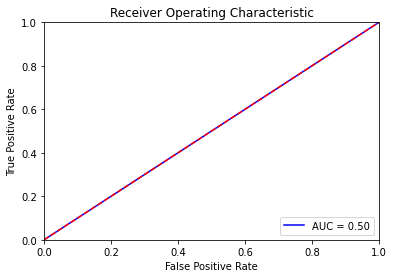

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Video Visualization


In [ ]:
from video_utils import *
import matplotlib.image as mpimg


In [ ]:
def capture_anomoulus_video_segment(video_path,video_key):
    max_processing_sec = 599
    sample_every_N_sec = 1
    frame_inc=16
    num_frames_per_clip = 16
    start_frame = 1
    
   # print(video_key)
    fc,fr=get_frame_count(video_path)
    
    end_frame = min(fc, int(max_processing_sec * fr)) -num_frames_per_clip
    
    video_feature =get_features_specific_video(video_key,"./out",)
    pred_a=sess.run(output,feed_dict={x: video_feature})
    
    #print(pred_a)
    
    start_frames=list(range(start_frame, end_frame, frame_inc))
    
    frame_bin=np.round(np.linspace(1, len(start_frames), num=33))
    
    pred_a=pred_a.flatten()
    fb_pre=np.where(pred_a>0.4)[0]
    
    video_segments=[]
    i=0
    
    #This loop is to locate exactly frame location where anomaly occured
    while(i<len(fb_pre)-1):
        s_seg=frame_bin[fb_pre[i]]*16
        if (fb_pre[i+1] -fb_pre[i] ==1): #diffrenciation 
            while(i<len(fb_pre)-1 and fb_pre[i+1]-fb_pre[i]==1):
                i +=1
            #i+=1
            e_seg=frame_bin[fb_pre[i]]*16+16
        else:
            i += 1
            e_seg=s_seg+16
        video_segments.append([s_seg,e_seg])
        
    v_map=frame_bin[fb_pre]*16
    return video_segments,v_map,pred_a #,p


In [ ]:
def clip_anoloums_video_from_segment(video_to_extract,video_key,output_vid_dir):
    vf,gf,pred_a=capture_anomoulus_video_segment(video_to_extract,video_key)
    
    #path to store Video segment
    path = os.path.join(output_vid_dir,video_key)
    os.makedirs(path, exist_ok=True)
    
    for start, end in vf:
        n_frames = int(end-start)
        extract_frames(video_to_extract,start,path,n_frames)
     
    output_video=os.path.join(path,video_key)
    if len(vf)>0:
        create_video(path,output_video+".avi")
    
    return gf,pred_a


generating video for RoadAccident

This solution also includes video and images where exact anomaly happened


In [ ]:
%cd /content/Anomaly-Detection-and-classification-in-surveillance-videos/

/content/Anomaly-Detection-and-classification-in-surveillance-videos


In [ ]:
!pip uninstall glob2

Found existing installation: glob2 0.7
Uninstalling glob2-0.7:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/glob2-0.7.dist-info/*
    /usr/local/lib/python3.7/dist-packages/glob2/*
Proceed (y/n)? y
  Successfully uninstalled glob2-0.7


In [ ]:
%cd /content

/content


In [ ]:
# Why errors??? Keeping error on glob...
# from glob2 import glob
# !pip3 install glob2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for glob2: filename=glob2-0.7-py2.py3-none-any.whl size=9320 sha256=65a49232c5ba8f75dc3b7c36bfa1ec5a349fe54270576d074d6dae1fdcd987ff
  Stored in directory: /root/.cache/pip/wheels/d7/3c/72/5300602ba1269ffce8cff5dcf7b525fee756b57455903c37ba
Successfully built glob2


In [ ]:
%cd /content/Anomaly-Detection-and-classification-in-surveillance-videos

/content/Anomaly-Detection-and-classification-in-surveillance-videos


In [ ]:
# Glob error needs to be resolved
# from glob2 import glob

In [ ]:
video_to_extract="/content/Anomaly-Detection-and-classification-in-surveillance-videos/data/RoadAccidents095_x264.mp4"

In [ ]:
frame_nos, pred_a = clip_anoloums_video_from_segment (video_to_extract, "RoadAccidents095_x264", "./test5")

width = 320.0
height = 240.0


NameError: ignored

In [ ]:
plt.plot(pred_a)
plt.ylabel('Regression value Between 1 and 0')
plt.xlabel('Prediction in 32 embedded frames')

NameError: ignored

Normal Videos are predicted as 0


In [ ]:
plt.plot(pred_a)
plt.ylabel('Regression value Between 1 and 0')
plt.xlabel('Prediction in 32 embedded frames')

NameError: ignored